# Bike Price Prediction

## Group No: 17

#### Group Members:         
    EG/2020/3814 - Aludeniya A.G.K.R.
    EG/2020/4130 - Rajapaksha A.N.I.

In [4218]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Import the dataset

In [4219]:
dataset = pd.read_csv('used-bikes.csv')

In [4220]:
#Show dataset
dataset.head()

,Summary,url,Title,Post_Details,Bike Type,Brand,Trim/Edition,Model,Year,Mileage,Seller,Capacity,Price
0,"Atv beach bike 201435,000 kmKegalle, Motorbike...",https://ikman.lk/en/ad/atv-beach-bike-2014-for...,Atv beach bike 2014,"Posted on 30 Jan 9:02 am, Kegalle City, Kegalle",Quadricycles,Other brand,Atv beach bike,Other model,2014,"35,000 km",lakee,150 cc,"440,000"
1,"Bajaj Pulsar 150 palsar 201450,737 kmAnuradhap...",https://ikman.lk/en/ad/bajaj-pulsar-150-palsar...,Bajaj Pulsar 150 palsar 2014,"Posted on 11 Mar 1:58 pm, Kekirawa, Anuradhapura",Motorbikes,Bajaj,palsar 150,Pulsar 150,2014,"50,737 km",Sasila Ishan,150 cc,"370,000"
2,"Beach Buggy 20055,000 kmColombo, MotorbikesRs ...",https://ikman.lk/en/ad/beach-buggy-2005-for-sa...,Beach Buggy 2005,"Posted on 21 Jan 9:45 pm, Talawatugoda, Colombo",Quadricycles,Other brand,Beach Buggy,Other model,2005,"5,000 km",vinuka automart,125 cc,"210,000"
3,"Electra Alpha Vino 2019600 kmColombo, Motorbik...",https://ikman.lk/en/ad/electra-alfa-vino-2019-...,Electra Alpha Vino 2019,"Posted on 22 Feb 2:26 pm, Moratuwa, Colombo",E-bikes,Electra,Vino,Alpha,2019,600 km,Jeewantha Basnayaka,49 cc,"105,000"
4,"Hero Maestro Edge 201818,500 kmMEMBERKalutara,...",https://ikman.lk/en/ad/hero-maestro-edge-2018-...,Hero Maestro Edge 2018,"Posted on 07 Mar 2:08 pm, Bandaragama, Kalutara",Scooters,Hero,2018,Maestro Edge,2018,"18,500 km",Anjalee Motors,110 cc,"80,000"


In [4221]:
#Shape of dataset
dataset.shape

(5016, 13)

In [4222]:
#Drop unnecessary columns
df = dataset.drop(['Summary', 'url', 'Title', 'Post_Details','Trim/Edition'],axis=1)

In [4223]:
#Show df
df

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Bike Type,Brand,Model,Year,Mileage,Seller,Capacity,Price
0,Quadricycles,Other brand,Other model,2014,"35,000 km",lakee,150 cc,"440,000"
1,Motorbikes,Bajaj,Pulsar 150,2014,"50,737 km",Sasila Ishan,150 cc,"370,000"
2,Quadricycles,Other brand,Other model,2005,"5,000 km",vinuka automart,125 cc,"210,000"
3,E-bikes,Electra,Alpha,2019,600 km,Jeewantha Basnayaka,49 cc,"105,000"
4,Scooters,Hero,Maestro Edge,2018,"18,500 km",Anjalee Motors,110 cc,"80,000"
...,...,...,...,...,...,...,...,...
5011,Motorbikes,Yamaha,Other Model,2015,"30,000 km",Dulshan Thaksara,250 cc,"580,000"
5012,Motorbikes,Yamaha,Other Model,1988,"20,000 km",PW Farm,50 cc,"125,000"
5013,Motorbikes,Yamaha,Other Model,2015,"32,270 km",PLS Motors & Credit (Pvt) Ltd,125 cc,"250,000"
5014,Motorbikes,Yamaha,Other Model,2018,"12,780 km",Ranjith Japanese Motorcycles,125 cc,"320,000"


In [4224]:
df.shape

(5016, 8)

In [4225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Bike Type  5016 non-null   object
 1   Brand      5016 non-null   object
 2   Model      5016 non-null   object
 3   Year       5016 non-null   int64 
 4   Mileage    5016 non-null   object
 5   Seller     5013 non-null   object
 6   Capacity   5016 non-null   object
 7   Price      5016 non-null   object
dtypes: int64(1), object(7)
memory usage: 313.6+ KB


In [4226]:
#Convert Price,capacity,mileage to integer type
df['Price'] = df['Price'].str.replace(',', '').astype(int)
df['Capacity'] = df['Capacity'].str.extract('(\d+)').astype(int)
df['Mileage'] = df['Mileage'].str.replace(',', '').str.extract('(\d+)').astype(int)

In [4227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Bike Type  5016 non-null   object
 1   Brand      5016 non-null   object
 2   Model      5016 non-null   object
 3   Year       5016 non-null   int64 
 4   Mileage    5016 non-null   int32 
 5   Seller     5013 non-null   object
 6   Capacity   5016 non-null   int32 
 7   Price      5016 non-null   int32 
dtypes: int32(3), int64(1), object(4)
memory usage: 254.8+ KB


In [4228]:
df

,Bike Type,Brand,Model,Year,Mileage,Seller,Capacity,Price
0,Quadricycles,Other brand,Other model,2014,35000,lakee,150,440000
1,Motorbikes,Bajaj,Pulsar 150,2014,50737,Sasila Ishan,150,370000
2,Quadricycles,Other brand,Other model,2005,5000,vinuka automart,125,210000
3,E-bikes,Electra,Alpha,2019,600,Jeewantha Basnayaka,49,105000
4,Scooters,Hero,Maestro Edge,2018,18500,Anjalee Motors,110,80000
...,...,...,...,...,...,...,...,...
5011,Motorbikes,Yamaha,Other Model,2015,30000,Dulshan Thaksara,250,580000
5012,Motorbikes,Yamaha,Other Model,1988,20000,PW Farm,50,125000
5013,Motorbikes,Yamaha,Other Model,2015,32270,PLS Motors & Credit (Pvt) Ltd,125,250000
5014,Motorbikes,Yamaha,Other Model,2018,12780,Ranjith Japanese Motorcycles,125,320000


### Handling Missing Values

In [4229]:
df.isnull().sum()

Bike Type    0
Brand        0
Model        0
Year         0
Mileage      0
Seller       3
Capacity     0
Price        0
dtype: int64

In [4230]:
#mode of the 'Seller'
seller_mode = df['Seller'].mode()[0]

# Fill null values with the mode of seller column
df['Seller'].fillna(seller_mode, inplace=True)



In [4231]:
df.isnull().sum()

Bike Type    0
Brand        0
Model        0
Year         0
Mileage      0
Seller       0
Capacity     0
Price        0
dtype: int64

### Drop Duplicate Rows

In [4232]:
duplicate_rows = df[df.duplicated()]
duplicate_rows


,Bike Type,Brand,Model,Year,Mileage,Seller,Capacity,Price
156,Motorbikes,Bajaj,CT100,2006,54000,Nilmini Bajaj Centre,100,75000
485,Motorbikes,Bajaj,Discover 125,2014,41000,Uditha Madushan,125,198000
1081,Motorbikes,Bajaj,Pulsar 150,2014,14000,Ranjaya Traders,150,116000
1082,Motorbikes,Bajaj,Pulsar 150,2014,14000,Ranjaya Traders,150,116000
1114,Motorbikes,Bajaj,Pulsar 150,2016,58000,AAA Auto Mart,150,410000
1222,Motorbikes,Bajaj,Pulsar 150,2014,14000,Ranjaya Traders,150,116000
1482,Motorbikes,Bajaj,Pulsar NS200,2017,40000,Minu Warsha Motors,200,525000
1483,Motorbikes,Bajaj,Pulsar NS200,2017,42000,Minu Warsha Motors,200,525000
1590,Motorbikes,Bajaj,V15,2016,19000,Piliyandala Scooty Mart - Suzuki Dealer,150,335000
1985,Motorbikes,Hero,Hunk,2017,30700,Minu Warsha Motors,150,111500


In [4233]:
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Bike Type,Brand,Model,Year,Mileage,Seller,Capacity,Price


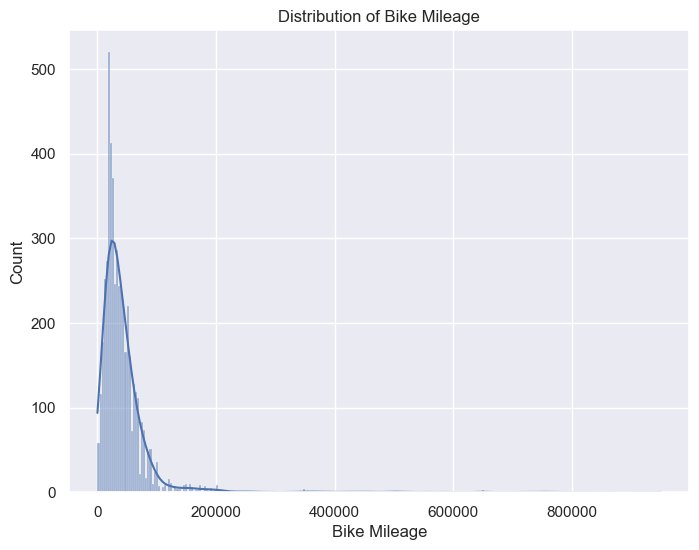

In [4234]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Mileage'], kde=True)
plt.title('Distribution of Bike Mileage')
plt.xlabel('Bike Mileage')
plt.show()

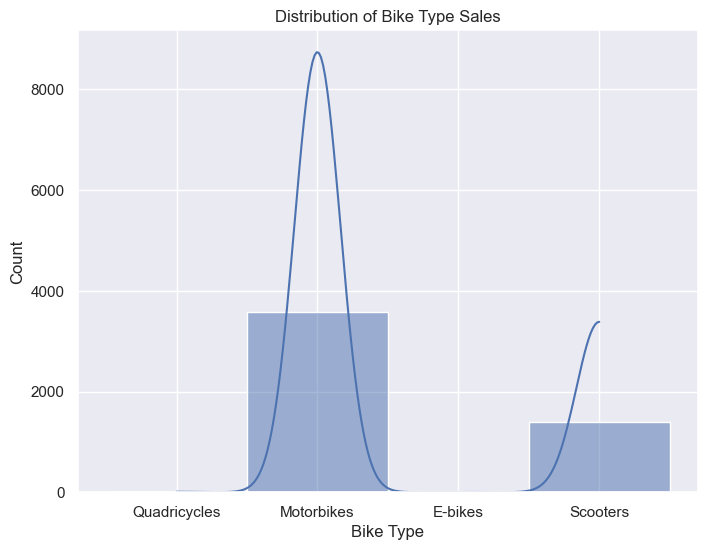

In [4235]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Bike Type'], kde=True)
plt.title('Distribution of Bike Type Sales')
plt.xlabel('Bike Type')
plt.show()

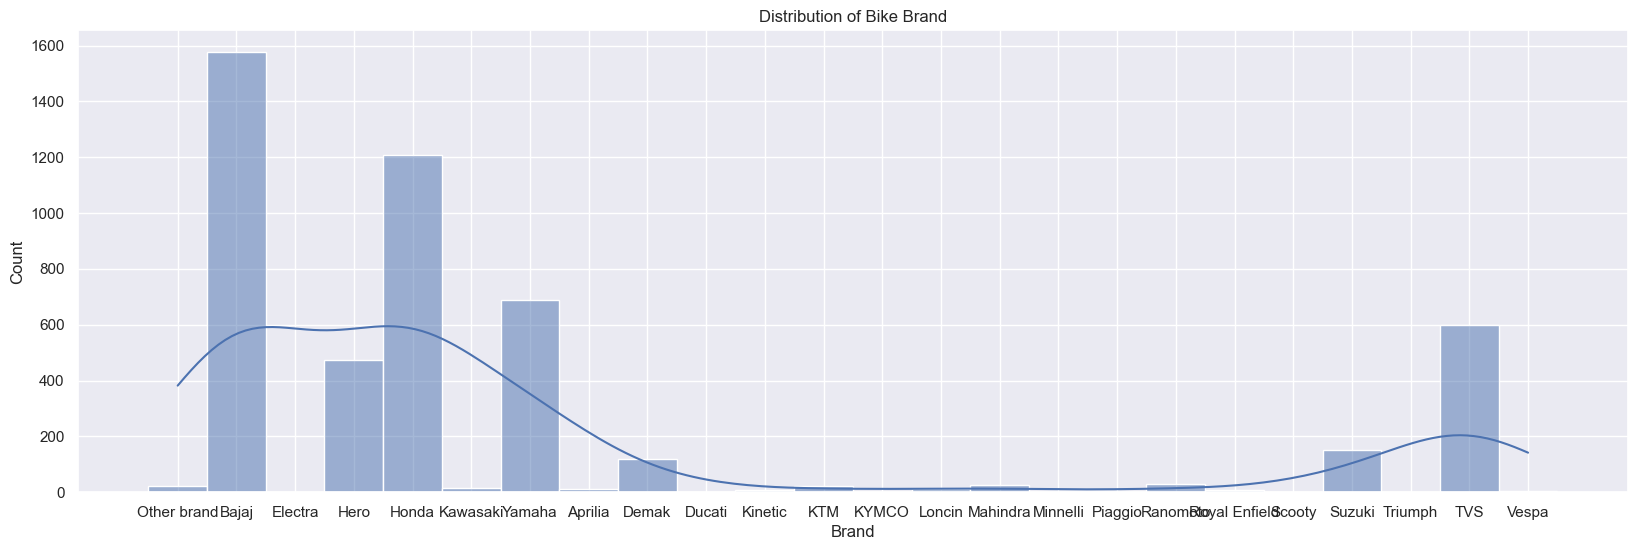

In [4236]:
plt.figure(figsize=(20, 6))
sns.histplot(df['Brand'], kde=True)
plt.title('Distribution of Bike Brand')
plt.xlabel('Brand')
plt.show()

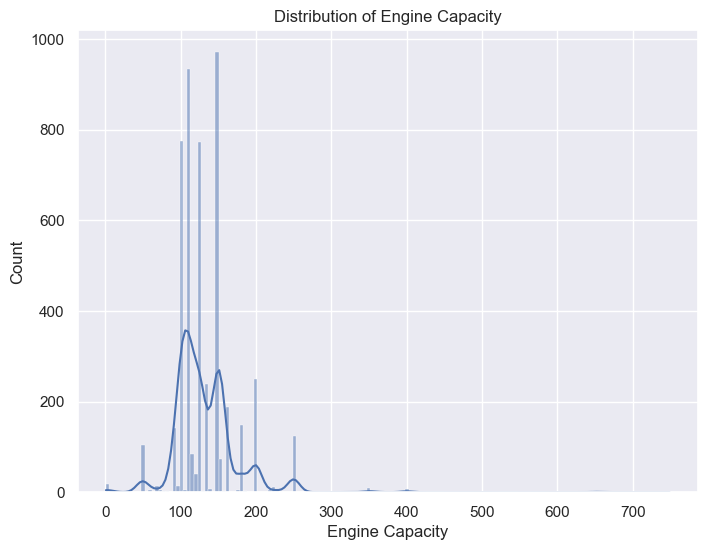

In [4237]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Capacity'], kde=True)
plt.title('Distribution of Engine Capacity')
plt.xlabel('Engine Capacity')
plt.show()

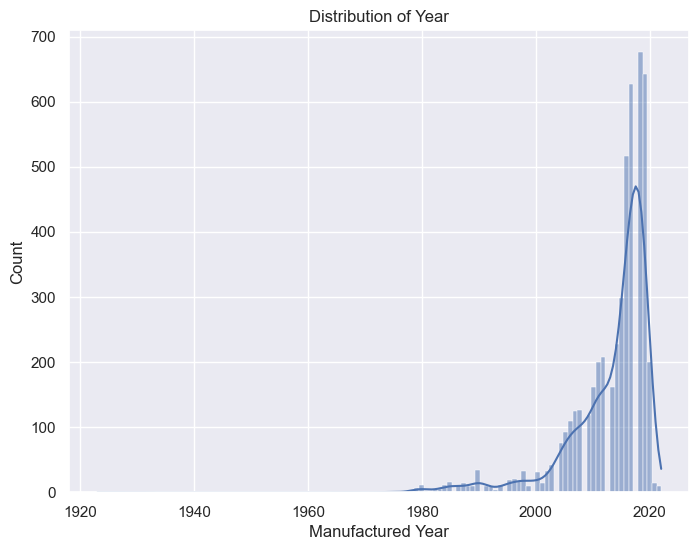

In [4238]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Year'], kde=True)
plt.title('Distribution of Year')
plt.xlabel('Manufactured Year')
plt.show()


### Label Encoding

In [4239]:
df_cat = df.select_dtypes(include=['object'])

In [4240]:
for col in df_cat:
    print(col, ':', df_cat[col].nunique(), '\n')

Bike Type : 4 

Brand : 24 

Model : 188 

Seller : 3194 



In [4241]:
# Label encoding for 'Model' and 'Seller'

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df.loc[:, 'Model'] = le.fit_transform(df['Model'])
df.loc[:, 'Seller'] = le.fit_transform(df['Seller'])

df.head()


,Bike Type,Brand,Model,Year,Mileage,Seller,Capacity,Price
0,Quadricycles,Other brand,112,2014,35000,2809,150,440000
1,Motorbikes,Bajaj,120,2014,50737,2020,150,370000
2,Quadricycles,Other brand,112,2005,5000,3157,125,210000
3,E-bikes,Electra,5,2019,600,917,49,105000
4,Scooters,Hero,100,2018,18500,116,110,80000


In [4242]:
df.columns

Index(['Bike Type', 'Brand', 'Model', 'Year', 'Mileage', 'Seller', 'Capacity',
       'Price'],
      dtype='object')

### One Hot Encoding

In [4243]:
#One hot encoding for 'Bike type' and 'Brand'
df = pd.get_dummies(df, columns=['Bike Type','Brand'], dtype=int)

In [4244]:
df

,Model,Year,Mileage,Seller,Capacity,Price,Bike Type_E-bikes,Bike Type_Motorbikes,Bike Type_Quadricycles,Bike Type_Scooters,...,Brand_Other brand,Brand_Piaggio,Brand_Ranomoto,Brand_Royal Enfield,Brand_Scooty,Brand_Suzuki,Brand_TVS,Brand_Triumph,Brand_Vespa,Brand_Yamaha
0,112,2014,35000,2809,150,440000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,120,2014,50737,2020,150,370000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,112,2005,5000,3157,125,210000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,5,2019,600,917,49,105000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100,2018,18500,116,110,80000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,111,2015,30000,571,250,580000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5012,111,1988,20000,1573,50,125000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5013,111,2015,32270,1570,125,250000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5014,111,2018,12780,1713,125,320000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4245]:
df.columns

Index(['Model', 'Year', 'Mileage', 'Seller', 'Capacity', 'Price',
       'Bike Type_E-bikes', 'Bike Type_Motorbikes', 'Bike Type_Quadricycles',
       'Bike Type_Scooters', 'Brand_Aprilia', 'Brand_Bajaj', 'Brand_Demak',
       'Brand_Ducati', 'Brand_Electra', 'Brand_Hero', 'Brand_Honda',
       'Brand_KTM', 'Brand_KYMCO', 'Brand_Kawasaki', 'Brand_Kinetic',
       'Brand_Loncin', 'Brand_Mahindra', 'Brand_Minnelli', 'Brand_Other brand',
       'Brand_Piaggio', 'Brand_Ranomoto', 'Brand_Royal Enfield',
       'Brand_Scooty', 'Brand_Suzuki', 'Brand_TVS', 'Brand_Triumph',
       'Brand_Vespa', 'Brand_Yamaha'],
      dtype='object')

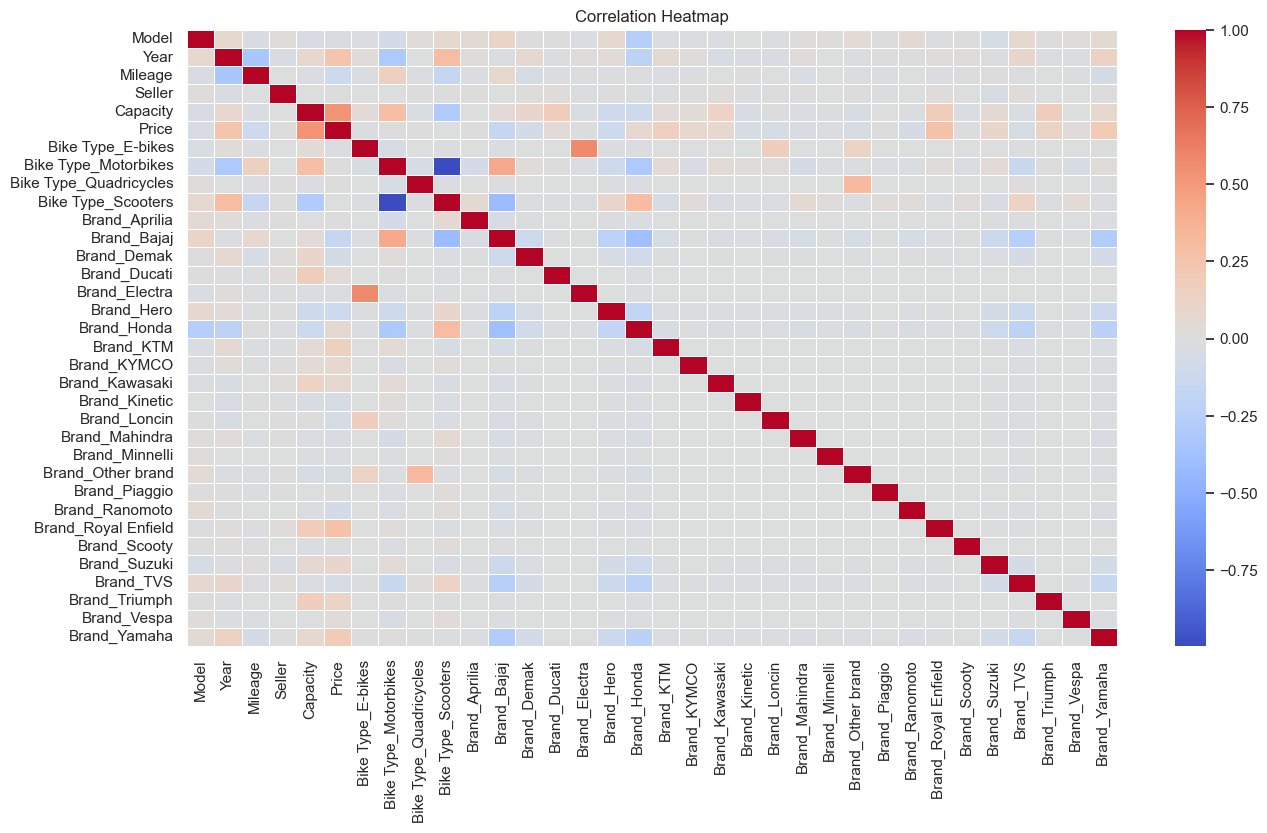

In [4246]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


### Train - Test split

In [4247]:
x = df.drop(['Price'],axis=1)
y = df['Price']

In [4248]:
from sklearn.model_selection import train_test_split

In [4249]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=50)

In [4250]:
print(x_train.shape)
print(y_train.shape)
print(x_test .shape)
print(y_test.shape)

(3735, 33)
(3735,)
(1245, 33)
(1245,)


 # Linear Regression

### Hyperparameter Tuning

In [4251]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': np.arange(-50, 50),
    'copy_X': [True, False],
    'positive': [True, False]
}


In [4252]:

#Create Linear Regression model
lr_model = LinearRegression()


In [4253]:
#GridSearchCV object
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [4254]:
# Fit model to the training data
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
       -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49]),
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [4255]:
# Best parameters found by GridSearchCV
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -50, 'positive': False}


In [4256]:
best_lr_model = grid_search.best_estimator_


In [4257]:

# Predict the test set using the best model
y_pred_best = best_lr_model.predict(x_test)


In [4258]:
#Result
mse_lr = mean_squared_error(y_test, y_pred_best)
mae_lr = mean_absolute_error(y_test, y_pred_best)
r2_lr = r2_score(y_test, y_pred_best)

print(f'Mean Squared Error : {mse_lr}')
print(f'Mean Absolute Error : {mae_lr}')
print(f'R^2 Score : {r2_lr}')


Mean Squared Error : 31955199051.114563
Mean Absolute Error : 127039.51201932691
R^2 Score : 0.5247474049025885


### Cross Validation for linear regression

In [4259]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [4260]:
linear_regressor = LinearRegression()

In [4261]:
# Cross validation
mse_lr_cv = -cross_val_score(linear_regressor, x, y, cv=5, scoring='neg_mean_squared_error').mean()
mae_lr_cv = -cross_val_score(linear_regressor, x, y, cv=5, scoring='neg_mean_absolute_error').mean()
r2_lr_cv = cross_val_score(linear_regressor, x, y, cv=5, scoring='r2').mean()


print("Linear Regression with Cross Validation")
print(f"Mean Squared Error (CV): {mse_lr_cv}")
print(f"Mean Absolute Error (CV): {mae_lr_cv}")
print(f"R^2 Score (CV): {r2_lr_cv}")

Linear Regression with Cross Validation
Mean Squared Error (CV): 40979543022.63648
Mean Absolute Error (CV): 141046.68984885368
R^2 Score (CV): 0.09751167467665608


 # Decision Tree

In [4262]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Split data into training and testing sets

In [4263]:

X = df.drop('Price', axis=1)
Y = df['Price']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)



In [4264]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()


### Hyperparameter tuning using GridSearchCV for decision tree

In [4265]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_dt_pred = dt_model.predict(X_test)


In [4266]:
dt_mse = mean_squared_error(Y_test, y_dt_pred)
dt_mae = mean_absolute_error(Y_test, y_dt_pred)
dt_r2 = r2_score(Y_test, y_dt_pred)


print("Decision Tree Regressor")
print(dt_model)
print(f"Mean Squared Error: {dt_mse}")
print(f"Mean Absolute Error: {dt_mae}")
print(f"R^2 Score: {dt_r2}")



Decision Tree Regressor
DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10)
Mean Squared Error: 30661353069.362778
Mean Absolute Error: 108863.20877067579
R^2 Score: 0.5439900846149044


### Cross validation

In [4267]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()



mse_cv = -cross_val_score(dt_regressor, X_test, y_dt_pred, cv=5, scoring='neg_mean_squared_error').mean()
mae_cv = -cross_val_score(dt_regressor, X_test, y_dt_pred, cv=5, scoring='neg_mean_absolute_error').mean()
r2_cv = cross_val_score(dt_regressor, X_test, y_dt_pred, cv=5, scoring='r2').mean()


print("Decision Tree Regressor with Cross Validation")
print(f"Mean Squared Error (CV): {mse_cv}")
print(f"Mean Absolute Error (CV): {mae_cv}")
print(f"R^2 Score (CV): {r2_cv}")

Decision Tree Regressor with Cross Validation
Mean Squared Error (CV): 18335171262.119194
Mean Absolute Error (CV): 41604.73155284543
R^2 Score (CV): 0.551847841018937


### Plot decision tree

In [4268]:
from sklearn import tree
features = list(df.columns[:-1])
target = ['Model', 'Year', 'Mileage', 'Seller', 'Capacity', 'Price',
       'Bike_Type_E-bikes', 'Bike_Type_Motorbikes', 'Bike_Type_Quadricycles',
       'Bike_Type_Scooters', 'Brand_Aprilia', 'Brand_Bajaj', 'Brand_Demak',
       'Brand_Ducati', 'Brand_Electra', 'Brand_Hero', 'Brand_Honda',
       'Brand_KTM', 'Brand_KYMCO', 'Brand_Kawasaki', 'Brand_Kinetic',
       'Brand_Loncin', 'Brand_Mahindra', 'Brand_Minnelli', 'Brand_Other brand',
       'Brand_Piaggio', 'Brand_Ranomoto', 'Brand_Royal Enfield',
       'Brand_Scooty', 'Brand_Suzuki', 'Brand_TVS', 'Brand_Triumph',
       'Brand_Vespa', 'Brand_Yamaha'
    
]

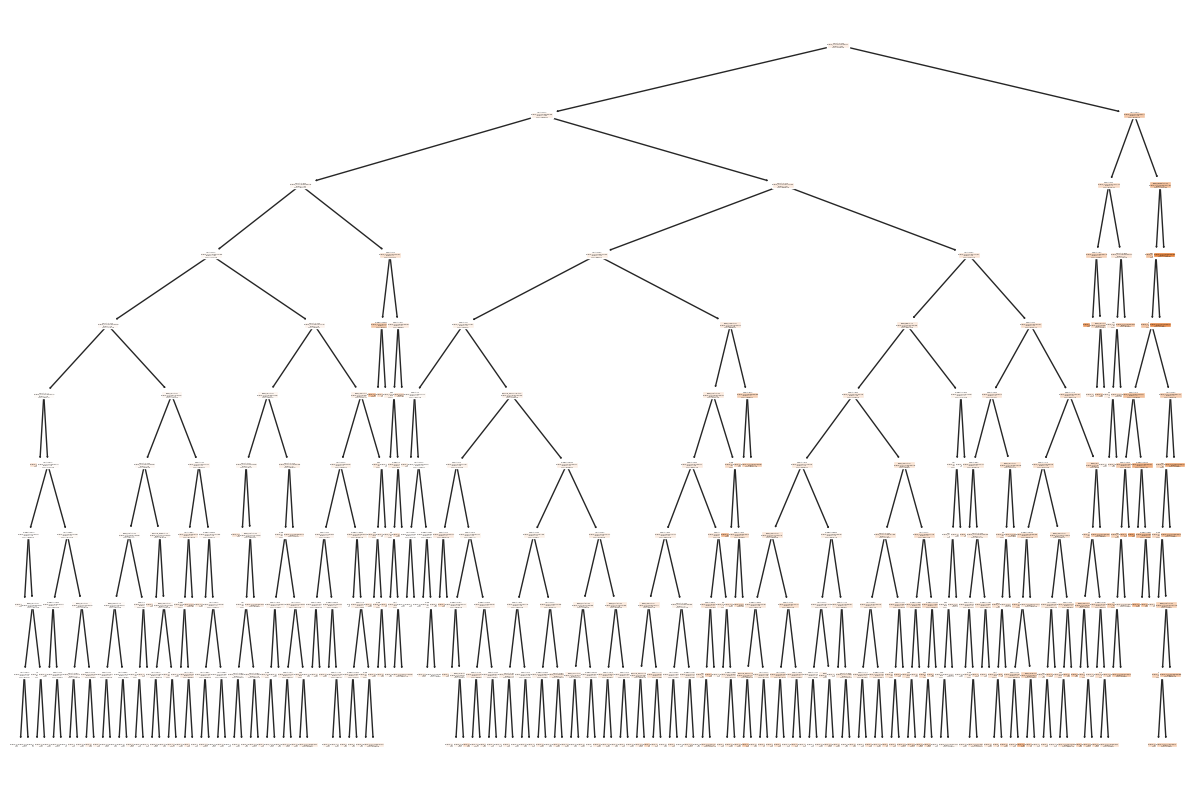

In [4269]:
plt.figure(figsize=(15, 10))
tree = tree.plot_tree(dt_model, feature_names=features, class_names=target, filled=True)